In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [35]:
#Read Data
data = pd.read_csv('ACS_data.csv', header=0)

In [36]:
data_sea = data[(data.City == 'Seattle')]
data_east = data[(data.City == 'Bellevue') | (data.City == 'Redmond') | (data.City == 'Kirkland')| (data.City == 'Sammamish')| (data.City == 'Issaquah')]
data_rest = data[(data.City != 'Seattle') & (data.City != 'Belleuve')& (data.City != 'Redmond')& (data.City != 'Kirkland')& (data.City != 'Sammamish')& (data.City != 'Issaquah')]

In [64]:
#data = data_sea
data = data_east
#data = data_rest

(array([  2.,   5.,  29.,  21.,  22.,  21.,  15.,   7.,   6.,   2.]),
 array([ 260000.,  321470.,  382940.,  444410.,  505880.,  567350.,
         628820.,  690290.,  751760.,  813230.,  874700.]),
 <a list of 10 Patch objects>)

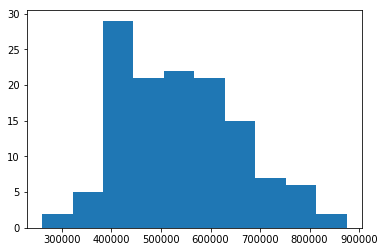

In [65]:
plt.hist(data['Median House value (dollars)'])

### Definition 1: Sociology 
#### Eligible for Gentrification:
* The block group’s median household income was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.
* The block group’s median house value was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.

#### Have gentrified:
* An increase in a block group’s educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all block groups in Seattle.
* An increase in a block group’s median house value, as measured by inflation-adjusted median house value, was in the top third percentile of all block groups in Seattle.


#### Calculations for Part1: Eligible for gentrification

In [66]:
# get the columns in variable names
median_income =np.array(data.loc[data['Year'] == 2015, 'Median income'])
median_housevalue =np.array(data.loc[data['Year'] == 2015, 'Median House value (dollars)'])

In [67]:
# find percentiles for median income, house value and bachelor degree holders
income_40th_perc = np.percentile(median_income, 40)
houseval_40th_perc = np.percentile(median_housevalue, 40)

#### Calculations for Part2: Have gentrified

In [68]:
def add_col_for_inflation_adjusted_house_price_2010(row):
    if row['Year'] == 2010:
        return row['Median House value (dollars)']*1.08

In [69]:
#inflation_adj_median_house_value = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)
data['inflation_adj_median_house_value'] = data.apply(add_col_for_inflation_adjusted_house_price_2010, axis = 1)

In [70]:
# get unique tract ids to iterate thru all records of 2015 and 2010
tract_id = data.Id.unique()

In [71]:
Data_for_2015 = np.where(data['Year']== 2015)
Data_for_2010 = np.where(data['Year']== 2010)


In [72]:
increase_in_edu_attainment_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    # to find the percentage increase subtract the bachelors degree % for 2010 from bachelors degree % of 2015
    perc_increase = data['Percentage: bachelors degree or higher'].iloc[i[0][0]] - data['Percentage: bachelors degree or higher'].iloc[i[0][1]]
    increase_in_edu_attainment_2015.append(perc_increase)

In [73]:
increase_in_edu_attainment_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    # to find the percentage increase subtract the bachelors degree % for 2010 from bachelors degree % of 2015
    perc_increase = data['Percentage: bachelors degree or higher'].iloc[i[0][0]] - data['Percentage: bachelors degree or higher'].iloc[i[0][1]]
    increase_in_edu_attainment_2015.append(perc_increase)

In [74]:
increase_in_house_value_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    perc_increase = data['Median House value (dollars)'].iloc[i[0][0]] - data['Median House value (dollars)'].iloc[i[0][1]]
    increase_in_house_value_2015.append(perc_increase)

In [75]:
data['increase_in_edu_attainment_2015'] = pd.Series(increase_in_edu_attainment_2015)
data['increase_in_house_value_2015'] = pd.Series(increase_in_house_value_2015)

In [76]:
increase_bachelor_degree_top3rd_percentile = np.percentile(increase_in_edu_attainment_2015, 66)
increase_house_value_top3rd_percentile = np.percentile(increase_in_house_value_2015, 66)

In [77]:
increase_house_value_top3rd_percentile

9964.0000000000073

#### Labelling the tracts per definition 1

In [78]:
def label_def1(row):
   if row['Year'] == 2010:
      return 'None'
   if row['Year'] == 2015 and row['Median income'] < income_40th_perc and row['Median House value (dollars)'] < houseval_40th_perc:
      return 'EligibleForGentrification'
   if row['Year'] == 2015 and row['increase_in_edu_attainment_2015'] > increase_bachelor_degree_top3rd_percentile and row['increase_in_house_value_2015'] > increase_house_value_top3rd_percentile:
      return 'HaveGentrified'
   else:
      return 'NotEligibleForGentrification'

In [79]:
data['def_1'] = data.apply(label_def1, axis=1)

In [80]:
data.head()

,Unnamed: 0,Id,Geography,City,Percentage: Public transportation (excluding taxicab),Percentage: Nonfamily household,Married-couple family household with own children,Percentage: bachelors degree or higher,Population 25 years and over,Median income,...,Median House value (dollars),Dwelling Units: - 3 or 4,Dwelling Units: -5 or more,3 or more vehicles available,Percentage: Not Hispanic or Latino: - White,Year,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def_1
150,150,53033021903,"Census Tract 219.03, King County, Washington",Kirkland,10,48,414.0,45.8,4235.0,71417,...,400700,94,1124,353,0.71,2015,NaN,NaN,NaN,EligibleForGentrification
156,156,53033022005,"Census Tract 220.05, King County, Washington",Kirkland,11,44,405.0,54.9,3301.0,90900,...,260000,165,804,239,0.56,2015,NaN,NaN,NaN,EligibleForGentrification
157,157,53033022006,"Census Tract 220.06, King County, Washington",Kirkland,8,46,331.0,46.9,2673.0,81056,...,364900,249,625,189,0.69,2015,NaN,NaN,NaN,EligibleForGentrification
158,158,53033022101,"Census Tract 221.01, King County, Washington",Kirkland,9,27,424.0,57.6,3266.0,100168,...,419900,56,234,440,0.83,2015,NaN,NaN,NaN,NotEligibleForGentrification
159,159,53033022102,"Census Tract 221.02, King County, Washington",Kirkland,6,29,692.0,62.6,3875.0,96863,...,427000,47,390,590,0.69,2015,NaN,NaN,NaN,EligibleForGentrification


### Definition 2: Financial & Economics
#### Currently gentrifying:
* The block group’s income levels below 40% of the median, and experienced rent increases greater than the median neighborhood did.

#### Have gentrified:
* The block group’s share of neighborhoods in a metro area that moved from the bottom half to the top half in the distribution of home prices.

#### Calculations for Part1: Currently gentrifying

In [81]:
median_income_40percent = np.percentile(median_income, 50)*0.4

#### Rent increase is NOT AVAILABLE. The data has renter occupied units which is different from rent. We are using renter occupied variable in definition 3. Need to discuss this.

In [82]:

high_rent_50percent = np.percentile(data['Renter-occupied housing units; MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - 30 percent or more'], 50)

#### Calculations for Part2: Have gentrified

In [83]:
home_price_50th_percentile_2010 = np.percentile(data.loc[data['Year'] == 2010, 'Median House value (dollars)'], 50)

In [84]:
home_price_50th_percentile_2015 = np.percentile(data.loc[data['Year'] == 2015, 'Median House value (dollars)'], 50)

In [85]:
increase_in_home_price_distribution_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['Median House value (dollars)'].iloc[i[0][0]] > home_price_50th_percentile_2015 and data['Median House value (dollars)'].iloc[i[0][1]] < home_price_50th_percentile_2010:
        increase_in_home_price_distribution_2015.append('true')
    else:
        increase_in_home_price_distribution_2015.append('false') 

In [86]:
data['increase_in_home_price_distribution_2015'] = pd.Series(increase_in_home_price_distribution_2015)

#### Labelling the tracts per definition 2

In [87]:
def label_def2(row):
   if row['Year'] == 2010:
      return 'None'
   if row['Year'] == 2015 and row['Median income'] < median_income_40percent and row['Renter-occupied housing units; MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS - 30 percent or more'] > high_rent_50percent:
      return 'CurrentlyGentrifying'
   if row['Year'] == 2015 and row['increase_in_home_price_distribution_2015'] == 'true': 
      return 'HaveGentrified'
   else:
      return 'NotCurrentlyGentrifying'

In [88]:
data['def_2'] = data.apply(label_def2, axis=1)

In [89]:
data.head()

,Unnamed: 0,Id,Geography,City,Percentage: Public transportation (excluding taxicab),Percentage: Nonfamily household,Married-couple family household with own children,Percentage: bachelors degree or higher,Population 25 years and over,Median income,...,Dwelling Units: -5 or more,3 or more vehicles available,Percentage: Not Hispanic or Latino: - White,Year,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def_1,increase_in_home_price_distribution_2015,def_2
150,150,53033021903,"Census Tract 219.03, King County, Washington",Kirkland,10,48,414.0,45.8,4235.0,71417,...,1124,353,0.71,2015,NaN,NaN,NaN,EligibleForGentrification,NaN,NotCurrentlyGentrifying
156,156,53033022005,"Census Tract 220.05, King County, Washington",Kirkland,11,44,405.0,54.9,3301.0,90900,...,804,239,0.56,2015,NaN,NaN,NaN,EligibleForGentrification,NaN,NotCurrentlyGentrifying
157,157,53033022006,"Census Tract 220.06, King County, Washington",Kirkland,8,46,331.0,46.9,2673.0,81056,...,625,189,0.69,2015,NaN,NaN,NaN,EligibleForGentrification,NaN,NotCurrentlyGentrifying
158,158,53033022101,"Census Tract 221.01, King County, Washington",Kirkland,9,27,424.0,57.6,3266.0,100168,...,234,440,0.83,2015,NaN,NaN,NaN,NotEligibleForGentrification,NaN,NotCurrentlyGentrifying
159,159,53033022102,"Census Tract 221.02, King County, Washington",Kirkland,6,29,692.0,62.6,3875.0,96863,...,390,590,0.69,2015,NaN,NaN,NaN,EligibleForGentrification,NaN,NotCurrentlyGentrifying


### Output data to csv file

In [63]:
data.to_csv('Seattle Labels.csv')

In [90]:
data.to_csv('East Labels.csv')